2a)

dv_y/dt = GMsin(theta)/(r^2) = GMsin(theta)/(x^2 + b^2) = GMb/(x^2 + b^2)^(3/2) 
t = x/v_x = x/c --> x = ct 
dv_y = GMb/(c^2t^2+b^2)^(3/2) dt

2b)

Newton: v_y = 2GM/(bc) = 4.25710^-6 radians = .878 arcsec 
GR: v_y = 8.515*10^-6 radians = 1.756 arcsec

3)

thetaDs - betaDs = Ddsalpha(hat) 
theta - beta = (Dds/Ds)alpha(hat) 
beta = theta - (Dds/Ds)(4GM)/(c^2 theta Dd)
0 = theta - (Dds/Ds)(4GM)/(c^2 theta Dd)
--> Mass = (Ds/Dds)(c^2*theta * Dd/(4G))
Mass = 5.925*10^42kg

4a)

If the source object is right behind the lensing mass then an einstein ring will form around the lensing mass.

In [2]:
# 4b)
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

Ds = 1768.2 * 3.08*10**22
Dds = 720.9 * 3.08*10**22
Dd = 1047.3 * 3.08*10**22
M = 5.925 * 10**42
c = 3 * 10**8
G = 6.67408 * 10**(-11)


def betax(x,y):
    theta = x - 400
    thetb = y - 400
    if theta > 0:
        beta = (theta) * (.05 * 4.848 * (10**(-6))) - (Dds/Ds) * (4*G*M) / ( (c**2) * np.sqrt(theta**2 + thetb**2) * (0.05 * 4.848 * (10**(-6)))* Dd)
        return beta
    else:
        beta = (theta) * (.05 * 4.848 * (10**(-6))) + (Dds/Ds) * (4*G*M) / ( (c**2) * np.sqrt(theta**2 + thetb**2) * (0.05 * 4.848 * (10**(-6)))* Dd)
        return beta

def betay(x,y):
    theta = x - 400
    thetb = y - 400
    if thetb > 0:
        beta = (thetb) * (.05 * 4.848 * (10**(-6))) - (Dds/Ds) * (4*G*M) / ( (c**2) * np.sqrt(theta**2 + thetb**2) * (0.05 * 4.848 * (10**(-6)))* Dd)
        return beta
    else:
        beta = (thetb) * (.05 * 4.848 * (10**(-6))) + (Dds/Ds) * (4*G*M) / ( (c**2) * np.sqrt(theta**2 + thetb**2) * (0.05 * 4.848 * (10**(-6)))* Dd)
        return beta


def xbeta(x,y):
    if x == 400:# or y == 400:
        return 0
    else:
        xbeta = betax(x,y)
        xbeta = int(round(206271 * xbeta / 0.05))
        return xbeta

def ybeta(x,y):
    if y == 400:# or x == 400:
        return 0
    else:
        ybeta = betay(x,y)
        ybeta = int(round(206271 * ybeta / 0.05))
        return ybeta

lscreen = np.zeros((800,800,2))
rscreen = np.zeros((800,800,2))

x = 1
y = 1

for x in range(1,801):
    #lscreen[x-1, y-1, 0] = xbeta(x,y)
    #lscreen[x-1, y-1, 1] = ybeta(x,y)
    for y in range(1,801):
        lscreen[799-x, 799-y, 0] = -xbeta(x,y)/10
        lscreen[799-x, 799-y, 1] = -ybeta(x,y)/10

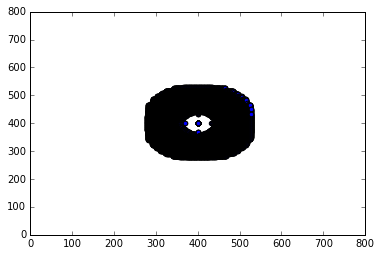

In [4]:
# 4b,c)
source = np.zeros((400,2))

i = 0
xoff = 0
yoff = 0
    
for a in range(-10,11):
        
    for b in range(-10,11):
        vala = a**2
        valb = b**2
        val = vala + valb
        value = int(round(np.sqrt(val)))
        if a == 0 and b == 0:
            i = i
        elif  value < 10:
            source[i,0] = a + xoff
            source[i,1] = b + yoff
            i += 1
            
ahit = []
bhit = []

xoff = 0
yoff = 0

for x in range(0, 800):
    
    for y in range(0, 800):
        
        for i in range(0,400):
            
            if source[i,0] == lscreen[x,y,0] and source[i,1] == lscreen[x,y,1]:
                if a != 0 and b !=0:
                    ahit.append(x+1)
                    bhit.append(y+1)
                    
plt.scatter(ahit,bhit)
plt.ylim(0,800)
plt.xlim(0,800)
plt.show()

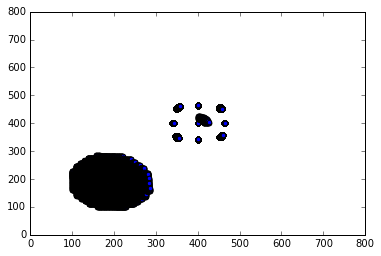

In [6]:
# 4d)
source = np.zeros((400,2))

i = 0
xoff = -20
yoff = -20
    
for a in range(-10,11):
        
    for b in range(-10,11):
        vala = a**2
        valb = b**2
        val = vala + valb
        value = int(round(np.sqrt(val)))
        if a == 0 and b == 0:
            i = i
        elif  value < 10:
            source[i,0] = a + xoff
            source[i,1] = b + yoff
            i += 1
            
ahit = []
bhit = []

for x in range(0, 800):
    
    for y in range(0, 800):
        
        for i in range(0,400):
            
            if source[i,0] == lscreen[x,y,0] and source[i,1] == lscreen[x,y,1]:
                if a != 0 and b !=0:
                    ahit.append(x+1)
                    bhit.append(y+1)
                    
plt.scatter(ahit,bhit)
plt.ylim(0,800)
plt.xlim(0,800)
plt.show()

5a)

tao = (sigma/m)*Sigma

5b)

Sigma = .02
--> sigma/m is sufficiently small that we cannot detect the scatter depth of particles.